# Multi-Armed Bandits

Again, likelihood is modeled as Bernoulli distribution.  
Prior is modeled as Beta distribution, and as conjugate, Posterior is Beta distribution.  

$$posterior \propto [\prod_{i=1}^{N}{\theta^{x_i}(1-\theta)^{1-x_i}}]\frac{\theta^{-a-1}(1-\theta)^{-b-1}}{Beta(a,b)}$$
After simple math 
$$posterior \propto Beta(a',b')$$ 
where:  
$$a' = a + \sum_{i=1}^{N}x^{i}$$
$$b' = b + N - \sum_{i=1}^{N}x^{i}$$

Note that, the next bandit to pull is selected by random variable sampled from the latest posterior estimation, such that it's intermediate probability to win is maximum.  This is a kind of feedback from online update of posterior.  This is called **Thompson sampling**.   

In [14]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import beta

%matplotlib inline 
plt.style.use('ggplot') # one of my favorits

In [6]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75] # Bernoulli probability 'p' to each Bandit 

In [30]:
# Bandit class 
class Bandit(object): 
    # p as synthetic probability of this bandit to win 
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1
        self.pulled = 0
        
    # sample random variable of Beta distribution based on latest posteria (a,b)
    def sample(self):
        return np.random.beta(self.a, self.b)
    
    # play bandit (Bernoulli random) 
    def pull(self):
        self.pulled += 1
        return np.random.random() < self.p
    
    # Update posteria 
    def update(self, x):
        self.a += x 
        self.b += (1-x) 


In [18]:
# plot posteria distribution to each bandit 
def plot_posteria(bandits, trial): 
    plt.figure()
    x = np.linspace(0,1,200)
    for bdt in bandits: 
        y = beta.pdf( x, bdt.a, bdt.b ) 
        plt.plot(x, y, label="real p: %.4f" % bdt.p)
    plt.title("Bandits distribution after %s trials" % trial)
    plt.legend()


In [31]:
# Run experiment 
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    # The point to which plot is generated 
    sample_points = [5,10,20.50,100,200,500,1000,1500,1999]
    
    for i in range(NUM_TRIALS):
        
        # take a random sample from each bandit's latest posteria 
        bestb = None 
        maxsample = -1 
        allsamples = []
        pulled = [] 
        for bdt in bandits:
            sample = bdt.sample()
            allsamples.append("%.4f" % sample) # append in string (logging purpose only)
            if sample > maxsample: 
                maxsample = sample 
                bestb = bdt
            
            # the number of pulled from each bandit 
            pulled.append( bdt.pulled )
        
        # plot and log-print 
        if i in sample_points:
            print("current samples: ", allsamples, "pulled count: ", pulled)
            plot_posteria(bandits, i)
            
        # play the bandit (pull the arm) for the bandit with the largest sampled variable 
        x = bestb.pull()
        
        # update the posterior distribution for the bandit whose arm we just pulled 
        bestb.update(x) 

            

current samples:  ['0.0790', '0.2710', '0.0170'] pulled count:  [1, 4, 0]
current samples:  ['0.2186', '0.3781', '0.4657'] pulled count:  [1, 7, 2]
current samples:  ['0.3030', '0.4120', '0.8283'] pulled count:  [4, 12, 84]
current samples:  ['0.4838', '0.4420', '0.7716'] pulled count:  [5, 14, 181]
current samples:  ['0.4349', '0.4603', '0.7683'] pulled count:  [6, 15, 479]
current samples:  ['0.3276', '0.4382', '0.7671'] pulled count:  [9, 15, 976]
current samples:  ['0.3024', '0.2831', '0.7366'] pulled count:  [14, 15, 1471]
current samples:  ['0.1382', '0.2620', '0.7501'] pulled count:  [14, 16, 1969]


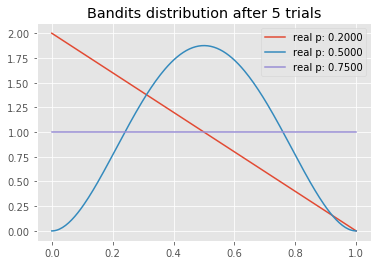

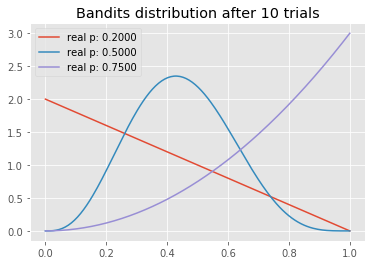

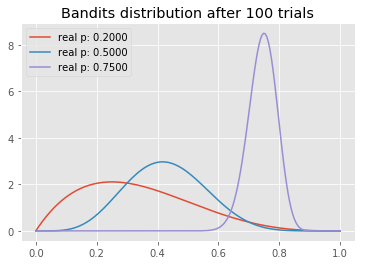

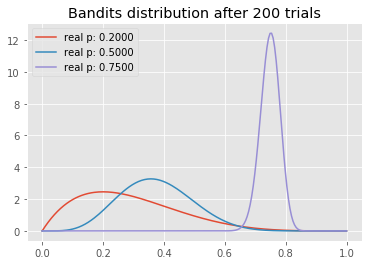

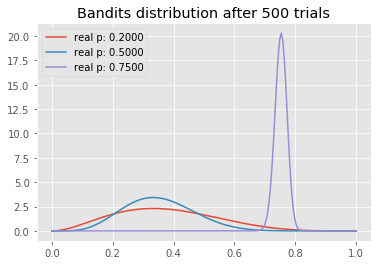

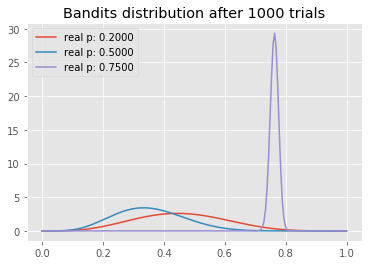

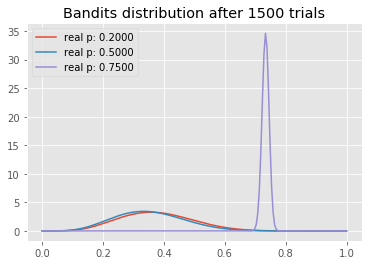

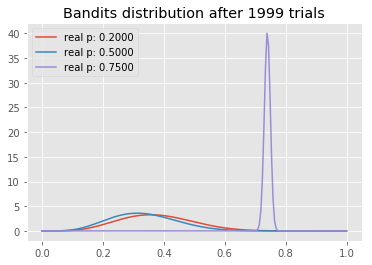

In [32]:
experiment()